# Notebook for the cell-cell interaction research of fetal stem cells with neuronal cells using liana package
- **Developed by:** Anna Maguza
- **Place:** Wuerzburg Institute for System Immunology
- **Date:** 20th November 2023

### Import required modules

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import liana as li
import anndata as ad

### Set up working environment

In [2]:
%matplotlib inline

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                         10.1.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.13.1
brotli                      1.1.0
certifi                     2023.11.17
cffi                        1.16.0
charset_normalizer          3.3.2
comm                        0.1.4
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
docrep                      0.3.2
exceptiongroup              1.1.3
executing                   2.0.1
fastjsonschema              NA
fqdn                        NA
get_annotations             NA
h5py                        3.10.0
idna                        3.4
importlib_resources         NA
ipykernel                   6.26.0
isodurati

In [4]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

### Data Upload

In [5]:
input_path = '/home/amaguza/data/Processed_data/Gut_data/Fetal_stem_cells/FetalSC_and_other_fetal_cells/FetalSC_and_neuronal_cells_raw.h5ad'
adata = sc.read_h5ad(input_path)

In [6]:
# Extract the raw counts
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 24971 × 26442
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels'
    var: 'feature_types-0-0-0', 'gene_name-1-0-0', 'gene_id-0-0', 'GENE-1-0'

In [7]:
X_is_raw(adata)

True

In [8]:
# Save raw counts in raw
adata.raw = adata

### Preprocess data

In [9]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after = 1e6)
sc.pp.log1p(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


### Liana Run

In [10]:
# import all individual methods
import liana 
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

In [11]:
# Run rank_aggregate
li.mt.rank_aggregate(adata, groupby='Cell States', expr_prop=0.1, verbose=True)

Using `.raw`!
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
2328 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/pandas/core/indexing.py:1819: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/_pipe_utils/_pre.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Using resource `consensus`.
0.10 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 24971 samples and 24114 features
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:246: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:343: RuntimeWarning: overflow encountered in power
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract


Assuming that counts were `natural` log-normalized!


/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/method/sc/_liana_pipe.py:337: RuntimeWarning: invalid value encountered in subtract
/home/amaguza/miniforge3/envs/liana_env/lib/python3.

Running CellPhoneDB


100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 80.03it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [05:43<00:00,  2.91it/s]


In [12]:
adata.uns['liana_res'].head()

,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,lr_probs,cellchat_pvals,specificity_rank,magnitude_rank
47037,Glia 3 (BCAN+),Glia 2 (ELN+),VIM,CD44,35.872925,0.0,64.040169,1.706475,NaN,0.055538,0.964533,0.000003,0.0,NaN,2.160074e-08
38528,Glia 3 (BCAN+),FXYD3+_CKB+_SC,APP,RPSA,16.643429,0.0,148.418030,1.091533,NaN,0.014575,0.976416,0.000010,0.0,NaN,3.408834e-08
36004,Branch A4 (IN),FXYD3+_CKB+_SC,APP,RPSA,16.731653,0.0,153.355576,1.128921,NaN,0.015060,0.976789,0.000010,0.0,NaN,3.408834e-08
46457,Glia 1 (DHH+),Glia 2 (ELN+),VIM,CD44,34.867271,0.0,62.221973,1.682984,NaN,0.053961,0.964037,0.000003,0.0,NaN,5.206474e-08
38227,Glia 2 (ELN+),FXYD3+_CKB+_SC,APP,RPSA,16.331173,0.0,130.942307,0.959180,NaN,0.012859,0.974929,0.000008,0.0,NaN,1.363465e-07


In [13]:
#Write anndata object to file
adata.write('/home/amaguza/data/Processed_data/Gut_data/Fetal_stem_cells/FetalSC_and_other_fetal_cells/FetalSC_and_neuronal_liana_aggregated.h5ad')

In [14]:
adata.obs['Cell States'].value_counts()

Cell States
ASS1+_SLC40A1+_SC       3979
RPS10+_RPS17+_SC        3544
ENCC/glia Progenitor    3234
cycling ENCC/glia       2923
Branch B1 (eMN)         1923
Branch A1 (iMN)         1712
Neuroblast              1650
Glia 3 (BCAN+)          1448
Glia 1 (DHH+)            956
cycling neuroblast       689
Branch A2 (IPAN/IN)      682
Glia 2 (ELN+)            552
Branch B2 (eMN)          501
Differentiating glia     459
FXYD3+_CKB+_SC           294
Branch A3 (IPAN/IN)      247
Branch A4 (IN)           127
Branch B3 (IPAN)          51
Name: count, dtype: int64

In [15]:
# Extract all values from neuronal.obs['Cell States'] into list
cell_states = []
for i in adata.obs['Cell States']:
    cell_states.append(i)


# Conver cell_states to a list
cell_states = list(cell_states)

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 70 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


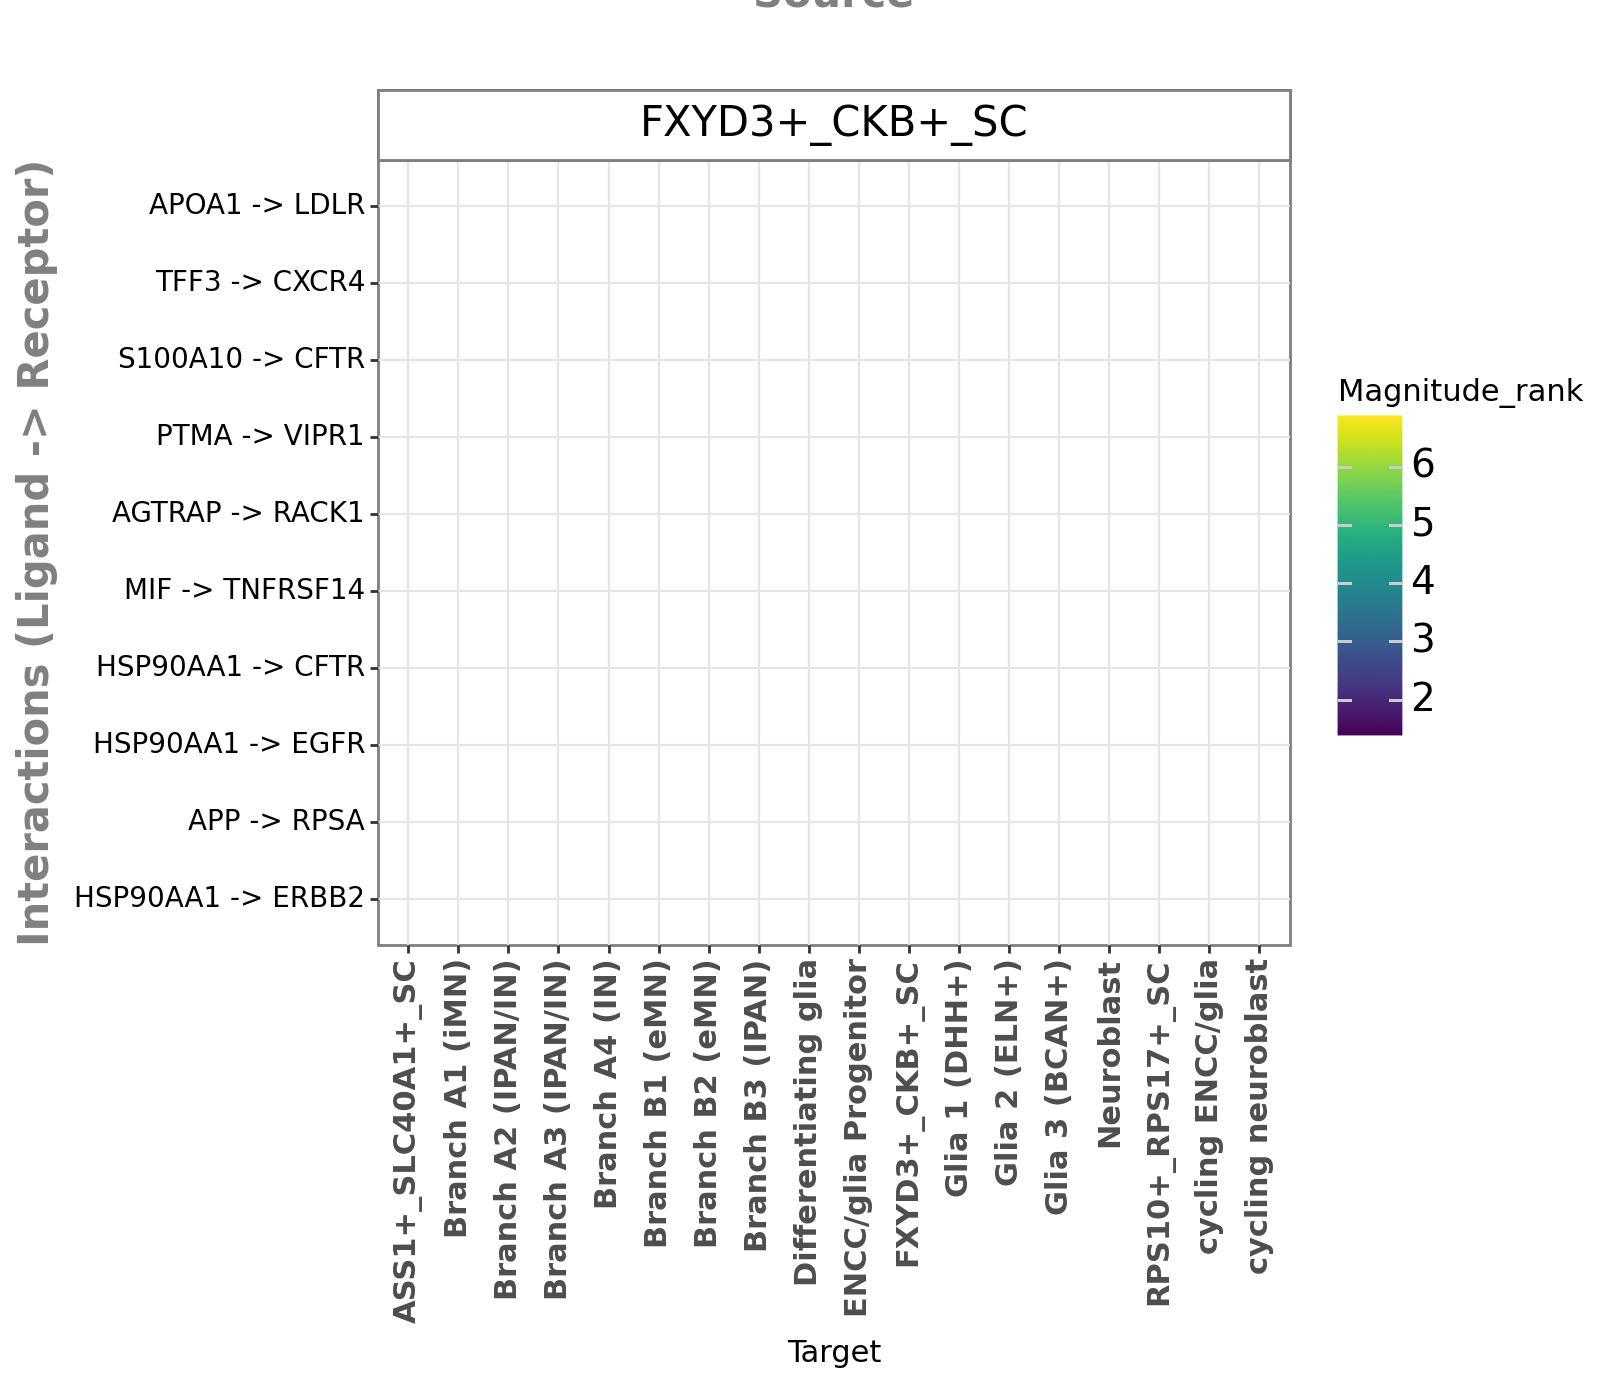

<Figure Size: (800 x 700)>

In [19]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['FXYD3+_CKB+_SC'],
              target_labels=cell_states,
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 78 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


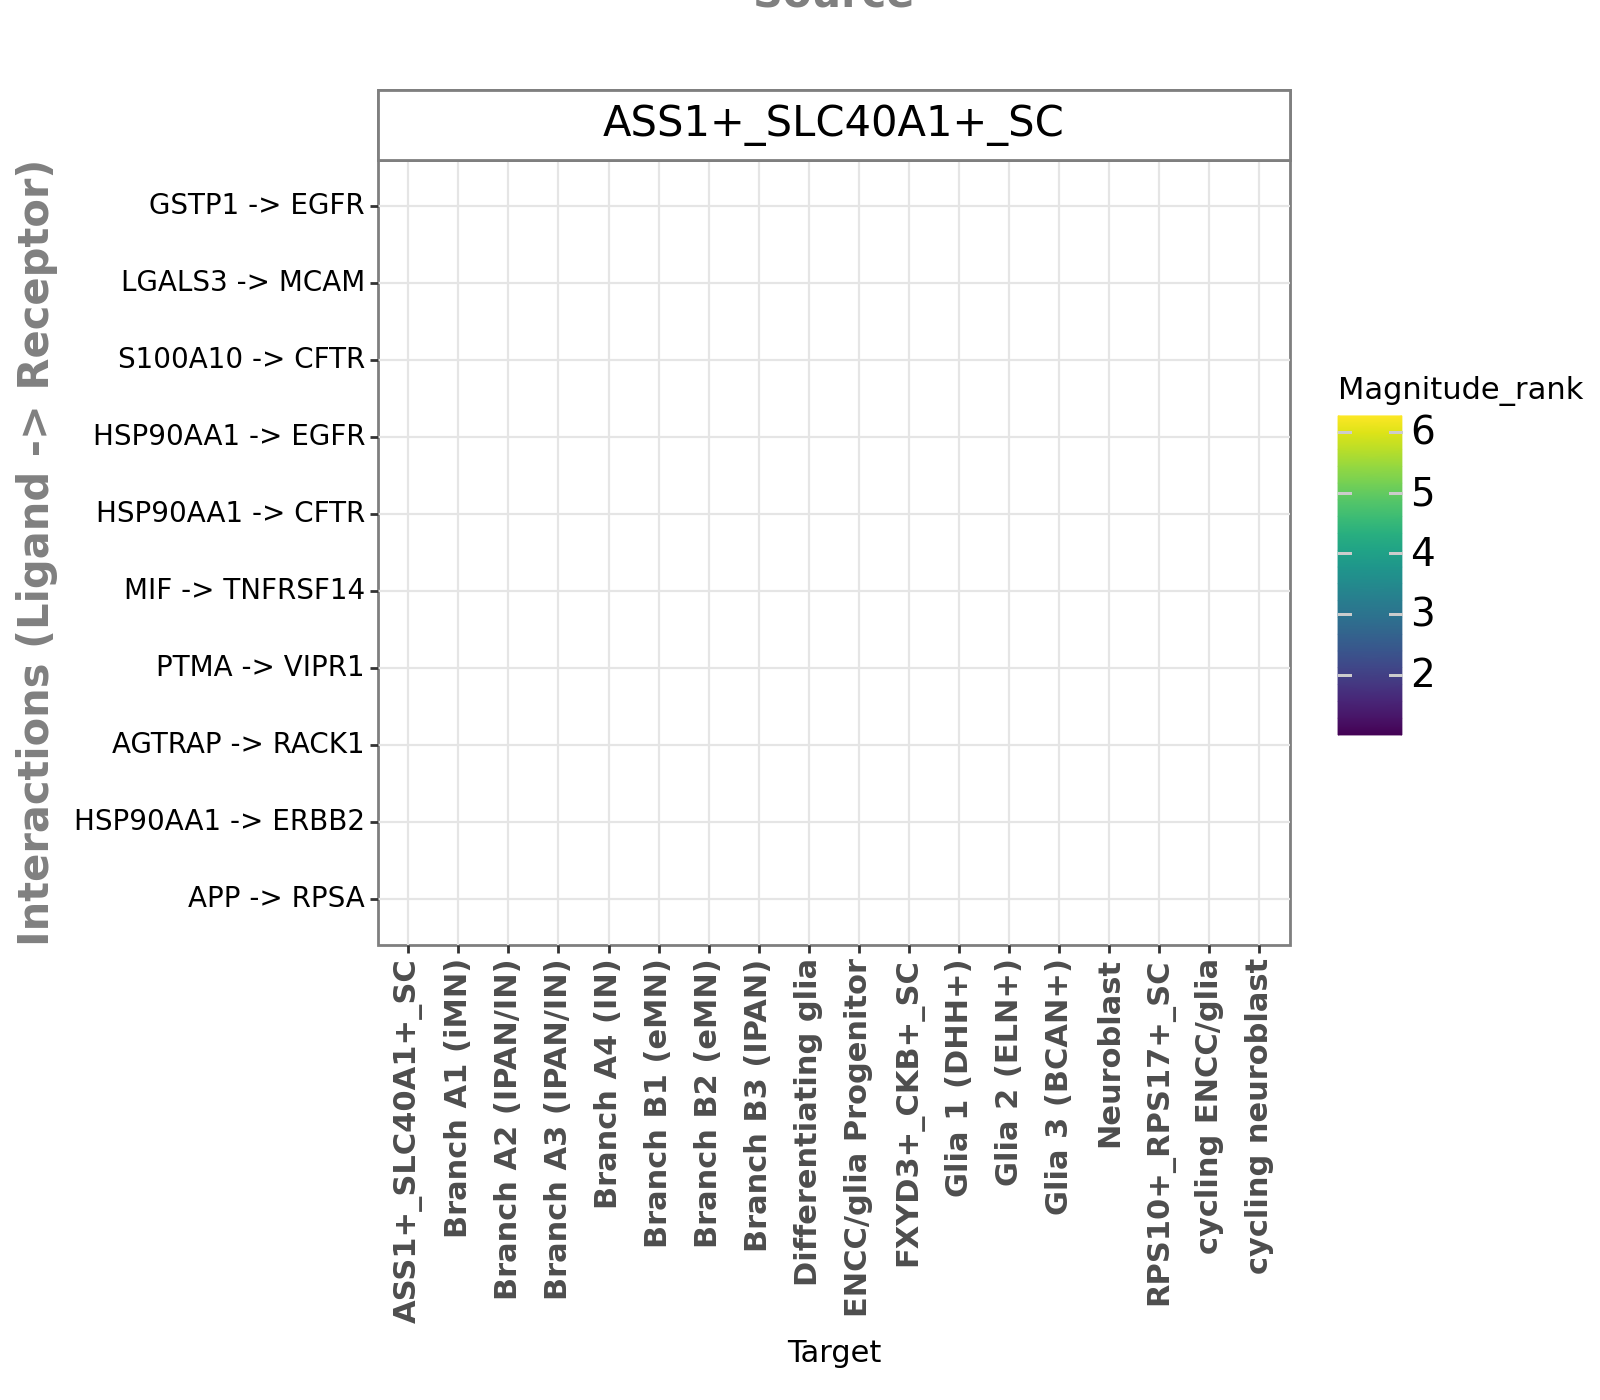

<Figure Size: (800 x 700)>

In [18]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['ASS1+_SLC40A1+_SC'],
              target_labels=cell_states,
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 81 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


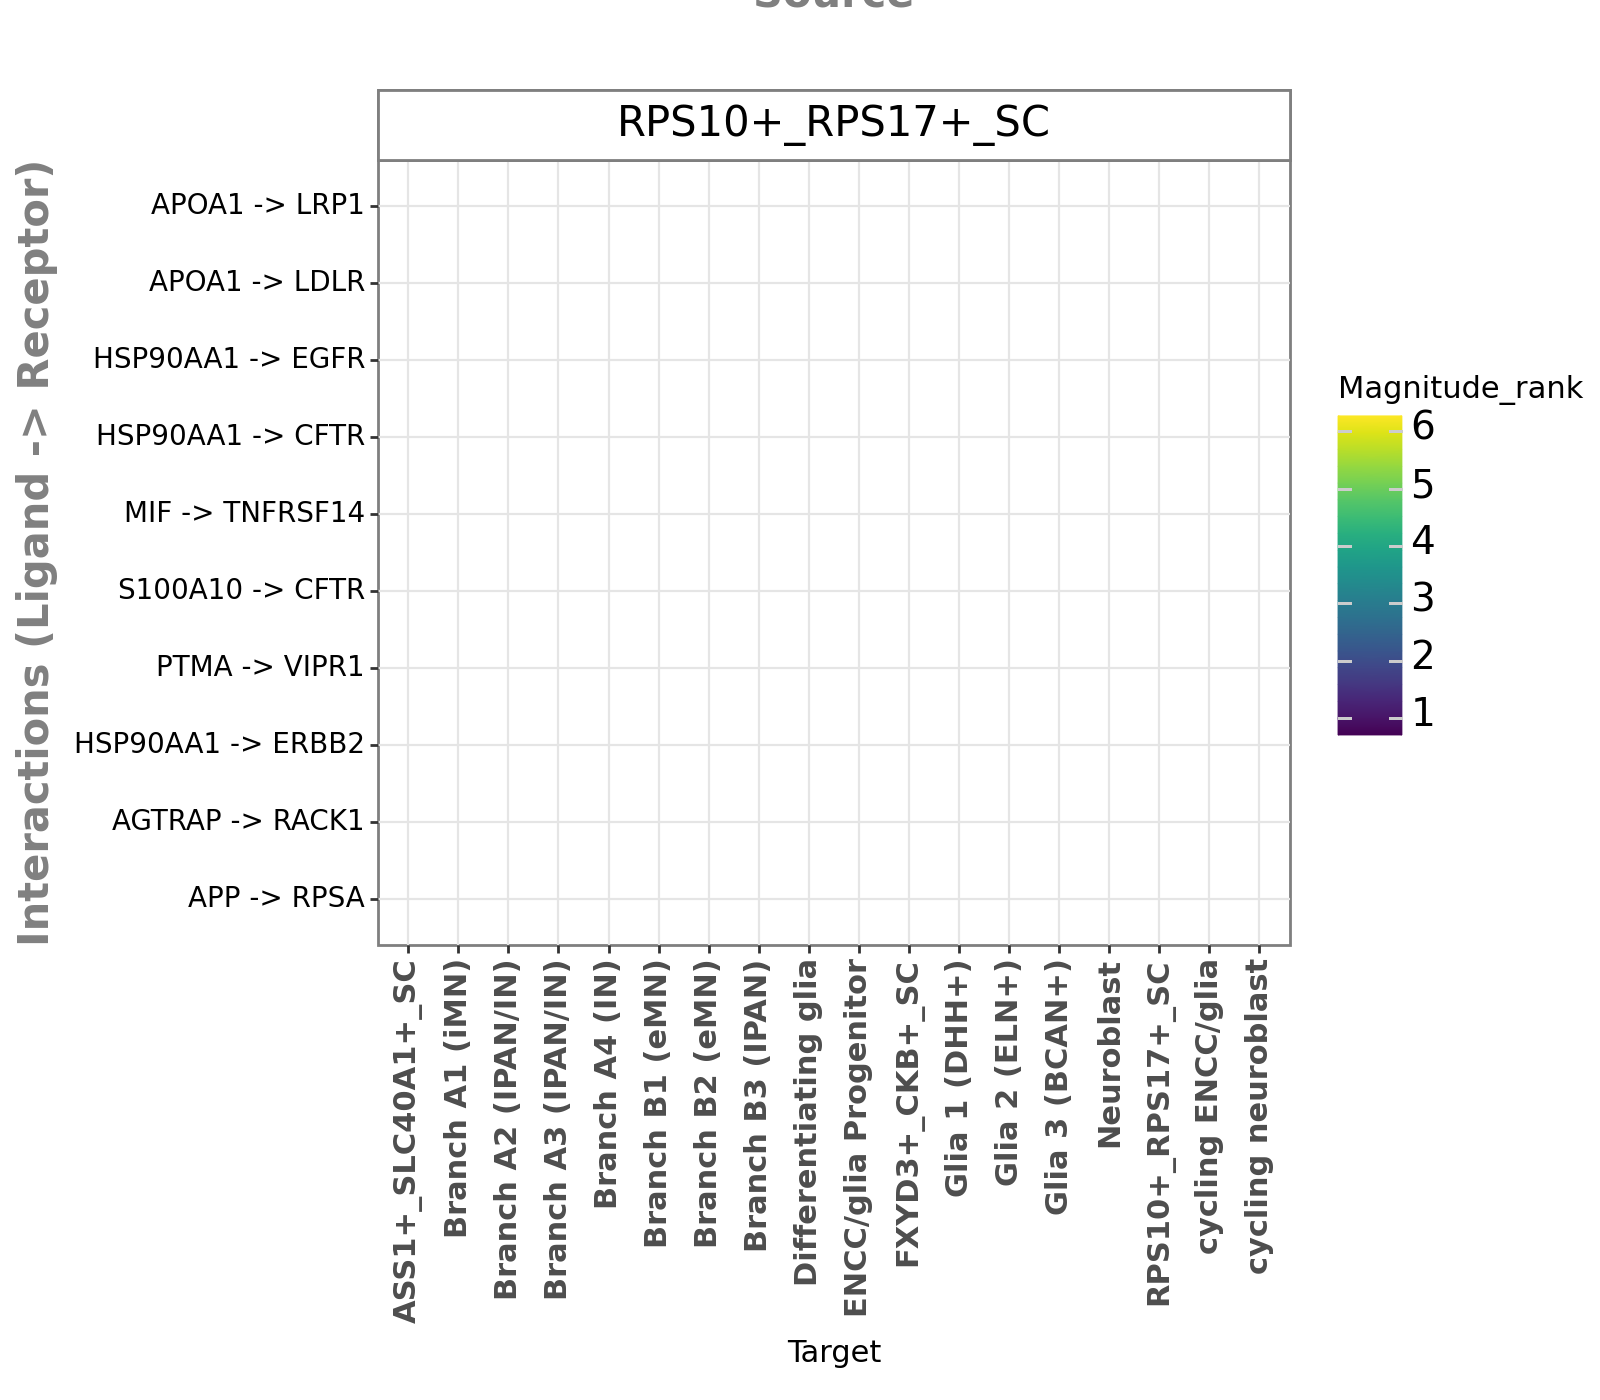

<Figure Size: (800 x 700)>

In [17]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=['RPS10+_RPS17+_SC'],
              target_labels=cell_states,
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 147 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


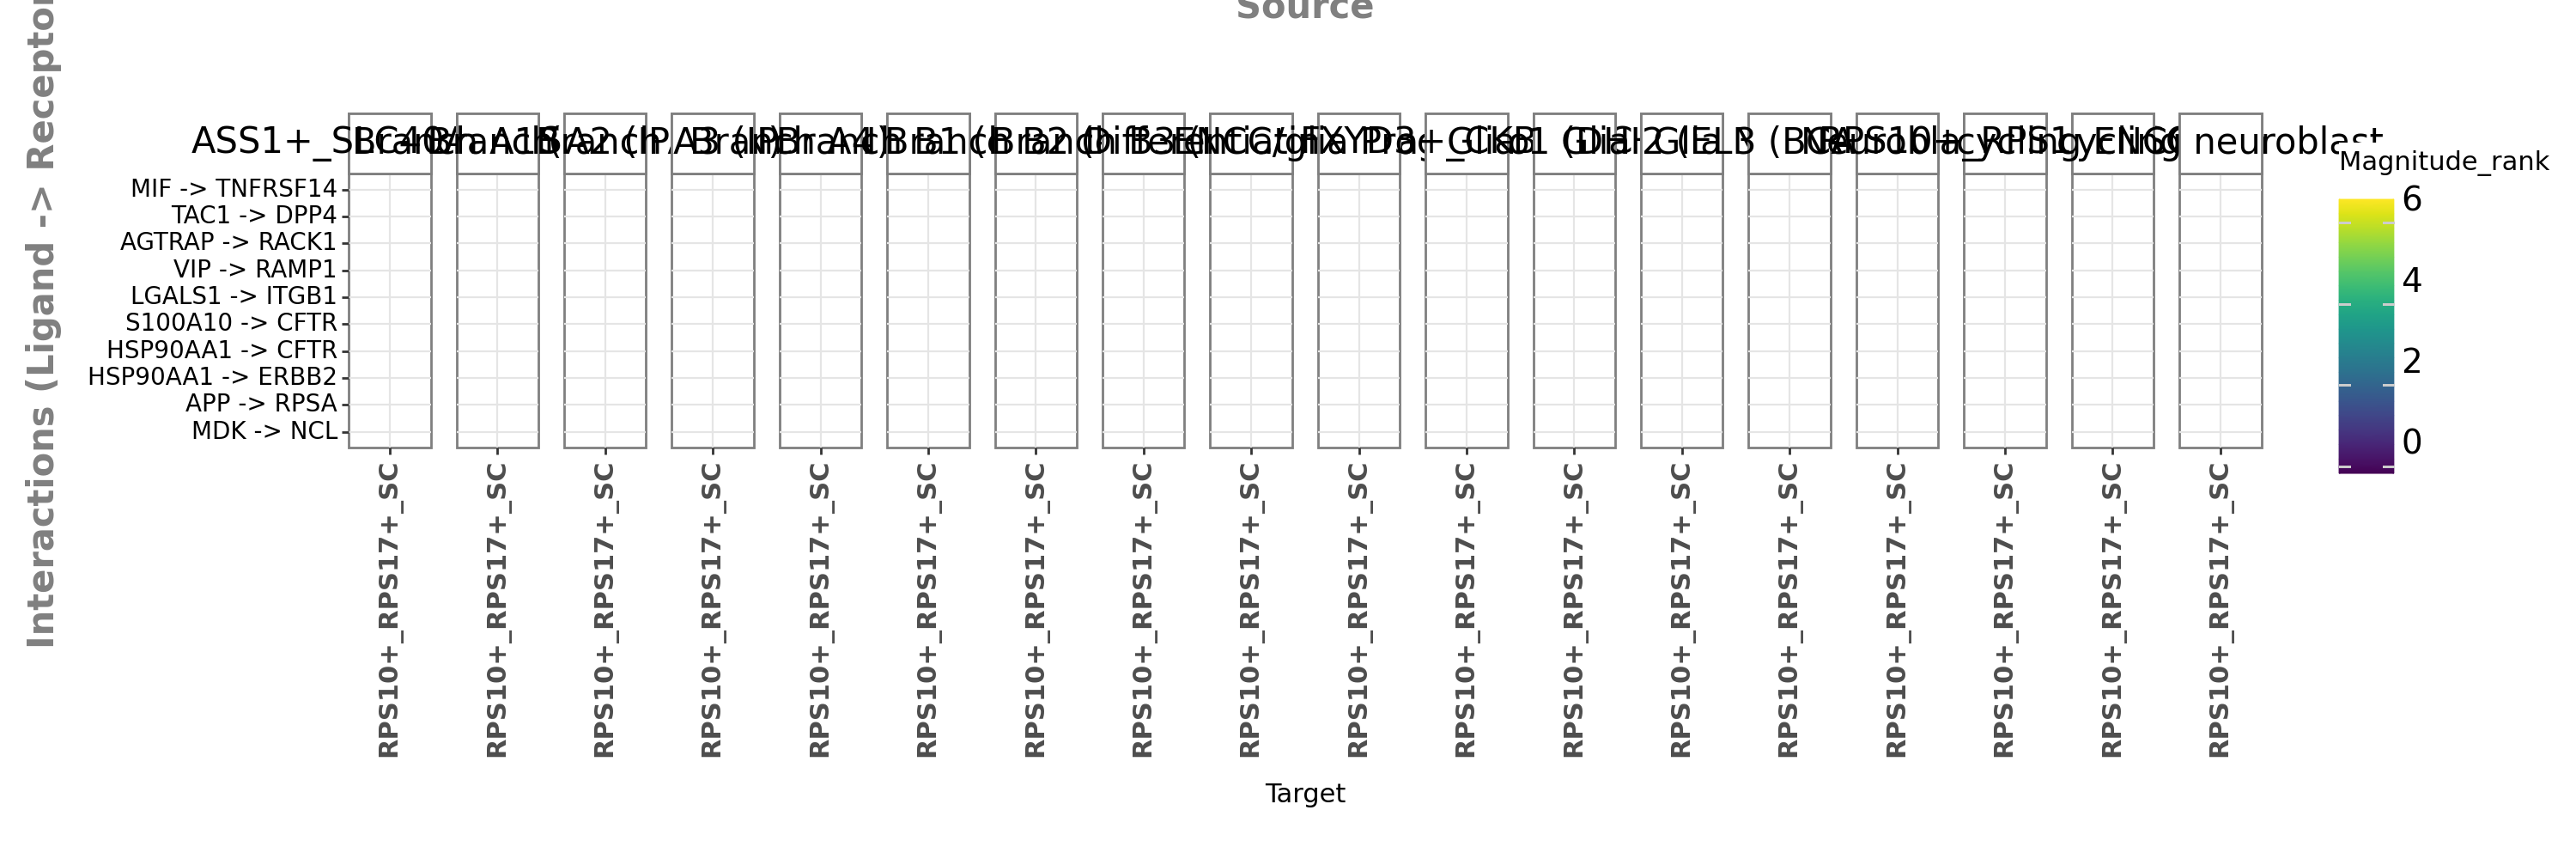

<Figure Size: (1500 x 500)>

In [22]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=cell_states,
              target_labels=['RPS10+_RPS17+_SC'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 5)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 161 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


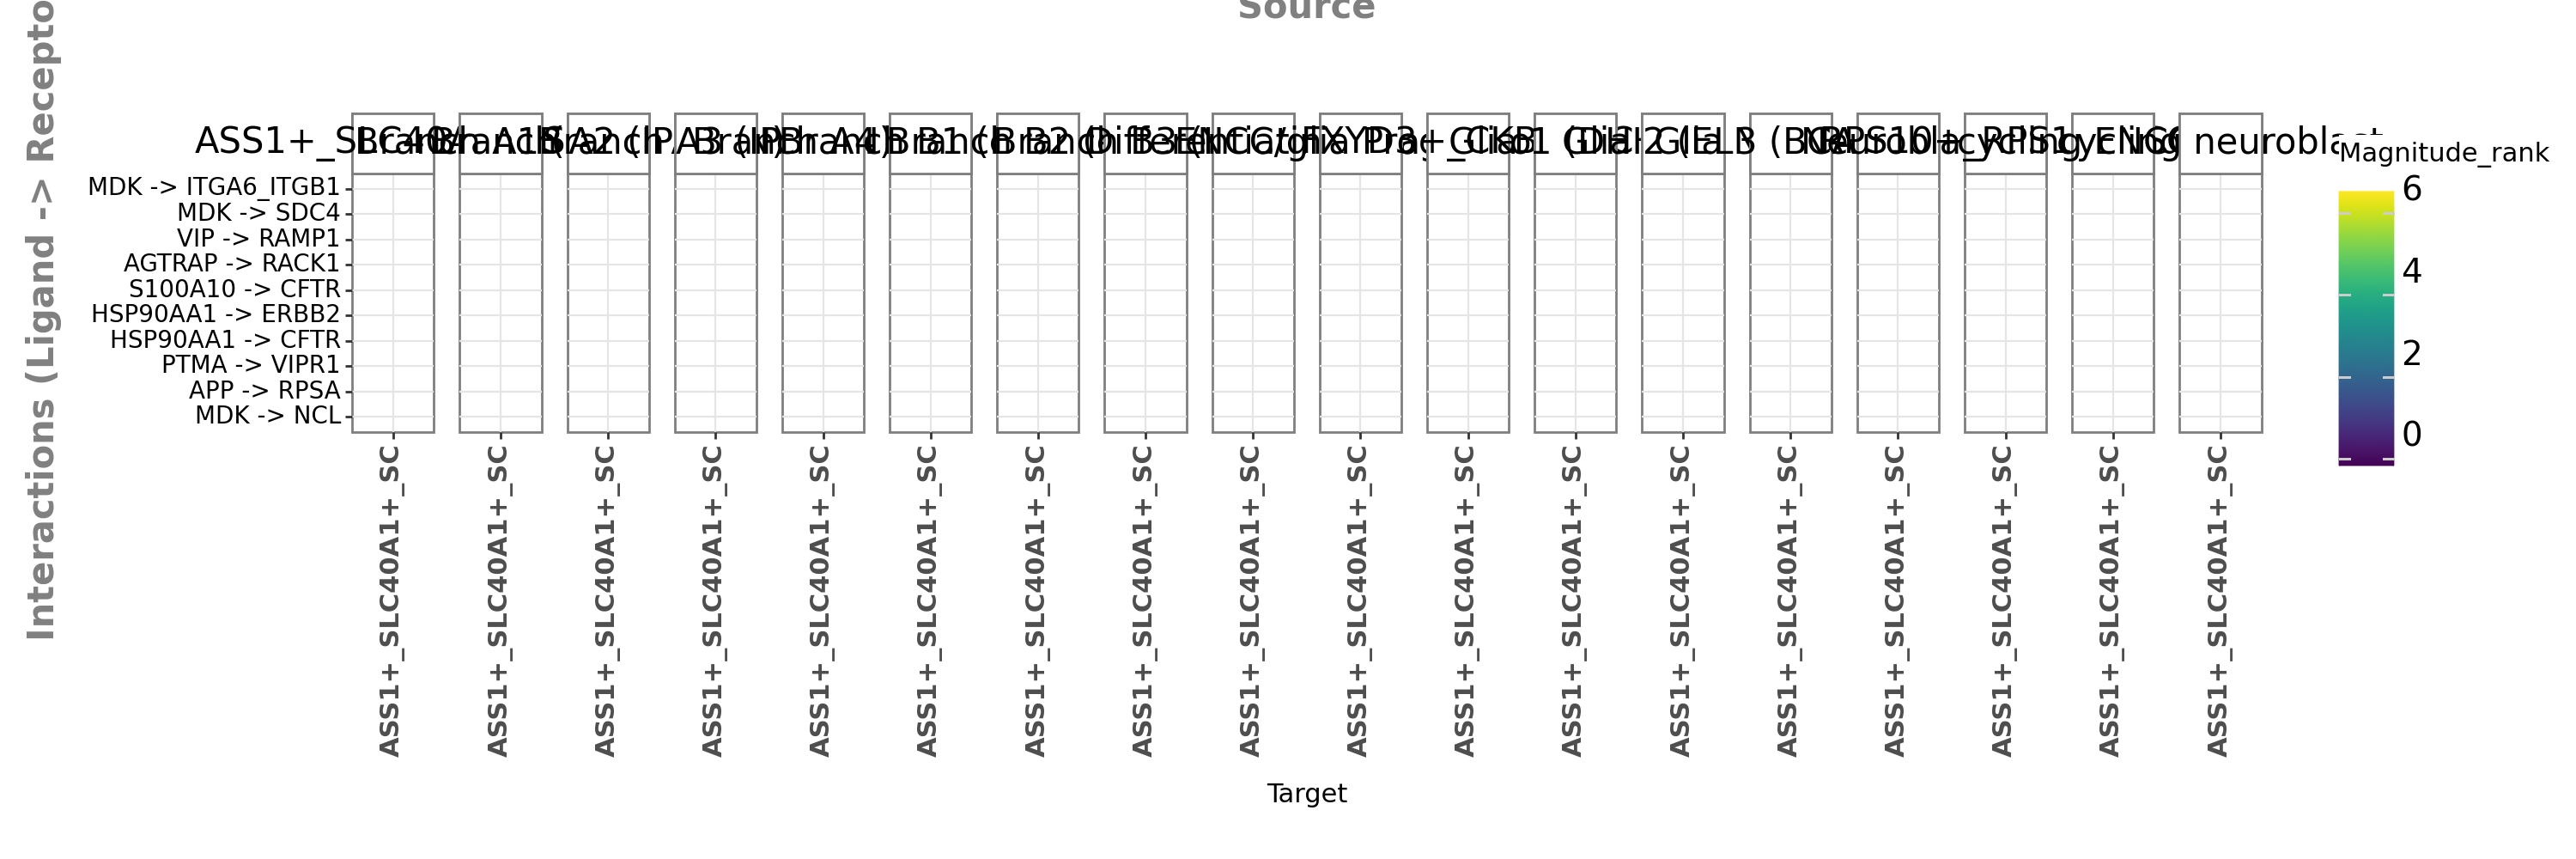

<Figure Size: (1500 x 500)>

In [23]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=cell_states,
              target_labels=['ASS1+_SLC40A1+_SC'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 5)
             )

/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/liana/plotting/_common.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/amaguza/miniforge3/envs/liana_env/lib/python3.9/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 171 rows containing missing values.
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


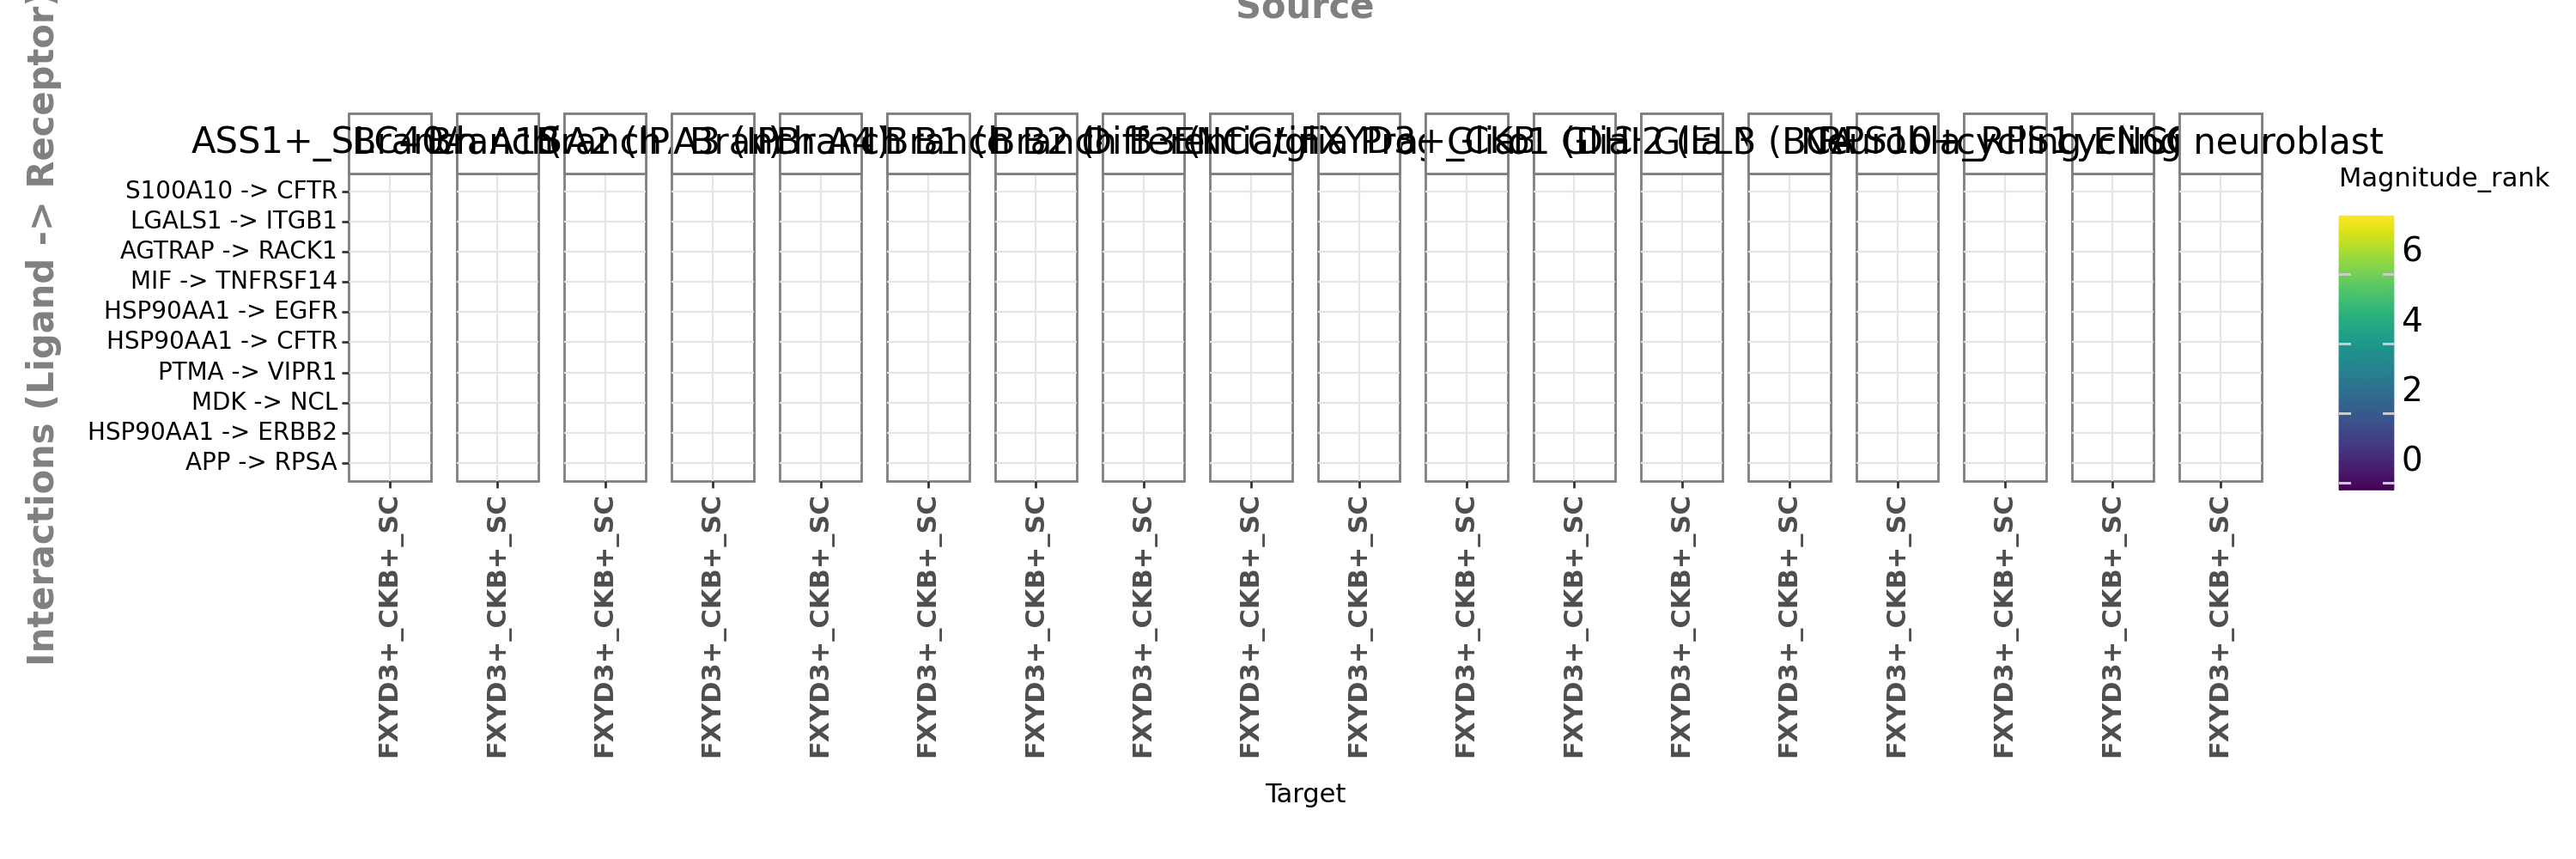

<Figure Size: (1500 x 500)>

In [24]:
li.pl.dotplot(adata = adata,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              source_labels=cell_states,
              target_labels=['FXYD3+_CKB+_SC'],
              top_n=10,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(15, 5)
             )